In [30]:
from pylab import*
from matplotlib import*

/Users/javier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


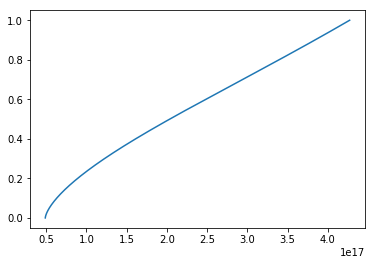

In [28]:
G=6.674e-11       #N kg^-2 m^2
rho_cr=1.e-26     #kg/m^3
Ho=np.sqrt(8.*pi*G*rho_cr/3.)
omegam=0.39
omegar=1.e-5
omega_lambda=1.-omegam-omegar

def f(a):
    return Ho*np.sqrt(omegam/a + omegar/(a*a) + a*a*omega_lambda)

N=100000
t=zeros(N)
a=zeros(N)
a[0]=1.
t[0]=13.6e9*pi*1.e7
h=-t[0]/N
for i in range(1,N):
    a[i]=a[i-1]+h*f(a[i-1])
    t[i]=t[i-1]+h
    
plot(t,a)
show()

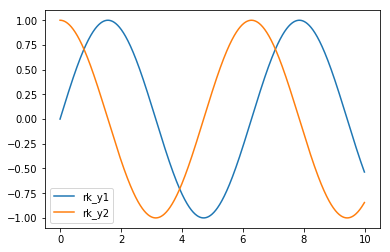

In [46]:
def f(t,y1,y2):
    return y2
def g(t,y1,y2):
    return -y1

N=1000
a,b=0.,10
h=(b-a)/N
t,y1,y2=zeros(N),zeros(N),zeros(N)
t[0],y1[0],y2[0]=a,0.,1.

for i in range(1,N):
    k1=h*f(t[i-1],y1[i-1],y2[i-1])
    l1=h*g(t[i-1],y1[i-1],y2[i-1])
    
    k2=h*f(t[i-1]+0.5*h,y1[i-1]+0.5*k1,y2[i-1]+0.5*l1)
    l2=h*g(t[i-1]+0.5*h,y1[i-1]+0.5*k1,y2[i-1]+0.5*l1)
    
    k3=h*f(t[i-1]+0.5*h,y1[i-1]+0.5*k2,y2[i-1]+0.5*l2)
    l3=h*g(t[i-1]+0.5*h,y1[i-1]+0.5*k2,y2[i-1]+0.5*l2)
    
    k4=h*f(t[i-1]+h,y1[i-1]+k3,y2[i-1]+l3)
    l4=h*g(t[i-1]+h,y1[i-1]+k3,y2[i-1]+l3)
    
    y1[i]=y1[i-1]+(1/6.)*(k1+2.*k2+2.*k3+k4)
    y2[i]=y2[i-1]+(1/6.)*(l1+2.*l2+2.*l3+l4)
    t[i]=t[i-1]+h
plot(t,y1,label='rk_y1')
#plot(t,sin(t),label='sin(t)')
plot(t,y2,label='rk_y2')
#plot(t,cos(t),label='cos(t)')
pylab.legend()
show()